In [ ]:
#librairies
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
from PIL import Image
import re

from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
from matplotlib.pyplot import imshow

In [ ]:
#Pour accéder aux données du drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Transformation fichiers wav en img

In [ ]:

dossier_f='/content/drive/MyDrive/DataMnist/fichiers_zeros_fenetrage/wav/test/fenetrefemme'
dossier_h='/content/drive/MyDrive/DataMnist/fichiers_zeros_fenetrage/wav/test/fenetrehomme'

def wav_to_img(dossier):
  k=0
  list=os.listdir(dossier)
  for file in list:
            k+=1
            print(k)
            #filename=re.sub(".jpg",".wav",filename)
            path=dossier+"/"+file
            samplingFrequency, signalData = wavfile.read(path)
            plt.specgram(signalData,Fs=samplingFrequency, cmap='viridis')
            filename_img=re.sub(".wav",".jpg",file)
            if dossier==dossier_f:
                plt.savefig('/content/drive/MyDrive/DataMnist/fichiers_zeros_fenetrage/spec/test/femme/'+filename_img)
            else:
                plt.savefig('/content/drive/MyDrive/DataMnist/fichiers_zeros_fenetrage/spec/test/homme/'+filename_img)
            os.remove(dossier+'/'+file)
       


## AlexNet

#### Preprocess des jpg pour Alexnet

In [ ]:
#Récupéraion et preprocess des données train
path='/content/drive/MyDrive/DataMnist/fichiers_zeros_fenetrage/spec/train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 8215 images belonging to 2 classes.


In [ ]:
#Infos sur les images en entrée
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 2)
Image Size of first image :  (227, 227, 3)
Output of first image :  (2,)


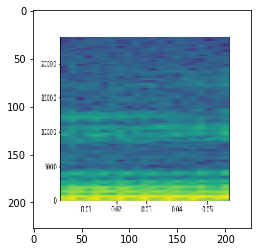

In [ ]:
#Spectrogramme au hasard
plt.imshow(train[0][0][12])


In [ ]:
#définition Algo AlexNet
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(2,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
#On feed les données au CNN + on affiche son architecture
alex = AlexNet(train[0][0].shape[1:])
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [95]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
#On entraîne
alex.fit_generator(train,epochs=12)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/12
257/257 [==============================] - 835s 3s/step - loss: 1.9711 - accuracy: 0.5396
Epoch 2/12
257/257 [==============================] - 36s 140ms/step - loss: 0.4644 - accuracy: 0.7676
Epoch 3/12
257/257 [==============================] - 36s 140ms/step - loss: 0.3524 - accuracy: 0.8403
Epoch 4/12
257/257 [==============================] - 36s 140ms/step - loss: 0.3027 - accuracy: 0.8637
Epoch 5/12
257/257 [==============================] - 36s 140ms/step - loss: 0.2677 - accuracy: 0.8785
Epoch 6/12
257/257 [==============================] - 36s 141ms/step - loss: 0.2654 - accuracy: 0.8812
Epoch 7/12
257/257 [==============================] - 36s 142ms/step - loss: 0.2338 - accuracy: 0.8914
Epoch 8/12
257/257 [==============================] - 36s 138ms/step - loss: 0.1928 - accuracy: 0.9171
Epoch 9/12
257/257 [==============================] - 36s 139ms/step - loss: 0.2035 - accuracy: 0.9141
Epoch 10/12
257/257 [==============================] - 35s 138ms/step - los

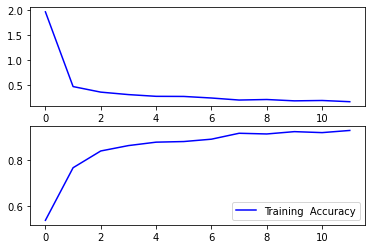

In [ ]:
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(alex.history.history['loss'],color='b',label='Training Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(alex.history.history['accuracy'],color='b',label='Training  Accuracy')

plt.legend()

### Test

In [ ]:
#On transforme encore en spectrogrammes, mais pour les données test
dossier_f_test='/content/drive/MyDrive/DataMnist/fichiers_zeros_fenetrage/spec/test/femme'
dossier_h_test='/content/drive/MyDrive/DataMnist/fichiers_zeros_fenetrage/spec/test/homme'

def wav_to_img(dossier):
    for filename in os.listdir(dossier):
        filename=re.sub(".jpg",".wav",filename)
        path=dossier+"/"+filename
        samplingFrequency, signalData = wavfile.read(path)
        plt.specgram(signalData,Fs=samplingFrequency, cmap='viridis')
        filename_img=re.sub(".wav","",filename)
        if dossier==dossier_f_test:
            plt.savefig('AudioMNIST-master/AudioMNIST-master/data/femme_test_png/'+filename_img)
        else:
            plt.savefig('AudioMNIST-master/AudioMNIST-master/data/homme_test_png/'+filename_img)
            

In [97]:
#Récupération des spectrogrammes pour la phase de test
path_test='/content/drive/MyDrive/DataMnist/fichiers_zeros_fenetrage/spec/test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 4808 images belonging to 2 classes.


In [96]:
#On répertorie les numéros des personnes utilisées pour la phase de test
dico=[]
for i in range(len(test.filenames)):
  dico.append(test.filenames[i][8:10])

In [ ]:
#Exemple d'un numéro de dico
dico[1]

'57'

In [ ]:
#Utilisée dans fonction suivante, permet de trouver indice d'une valeur dans une liste
def return_ind(w,i):
  for j in range (len(w)):
    if w[j]==i:
      return j

In [ ]:
#Compte le nombre d'échantillons différents associés à chaque personne
def compter(dico):
  w=[]
  compte=[]
  for i in range(len(dico)):
    if dico[i] in w:
      j=return_ind(w,dico[i])
      compte[j]+=1
    else:
      w.append(dico[i])
      compte.append(1)
  return compte


In [ ]:
# Par exemple, la première personne a les 551 premiers échantillons qui lui sont associés
compte

[551, 625, 619, 600, 558, 667, 575, 613]

In [ ]:
#Affichage des résultats du test en terme de perte et d'Accuracy
prediction = alex.evaluate_generator(test)
print ("Loss = " + str(prediction[0]))
print ("Test Accuracy = " + str(prediction[1]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Loss = 0.6189321875572205
Test Accuracy = 0.6734609007835388


In [ ]:
#Affichage des probas pour chaque échantillon
y_pred=alex.predict_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
#Prise dé décision pour l'attribution de la classe
y_res=[]
for i in range (len(y_pred)):
  if y_pred[i][0]>y_pred[i][1]:
    y_res.append(0)
  else:
    y_res.append(1)

In [ ]:
#Sépare en différentes listes les résultats obtenus pour chaque personne
def split(y,compte):
  splitted=[]
  copy=y
  for i in range(len(compte)):
    list=[]
    for j in range(compte[i]):
                   list.append(copy[j])
    splitted.append(list)
    copy=copy[compte[i]:]
  return splitted

In [ ]:
y=split(y_res,compte)

In [ ]:
#Vote majoritaire : on attribue à chaque personne la classe la plus attribuée dans tous ses échantillons de parole
def vote(y):
  resultat_final=[]
  for i in range (len(y)):
    sum_0=0
    sum_1=0
    for j in range (len(y[i])):
      if j==0:
        sum_0+=1
      else:
        sum_1+=1
    if sum_0>sum_1:
      resultat_final.append(0)
    else:
      resultat_final.append(1)
  return resultat_final

Boucles pour différents tests

In [ ]:
#Boucle où on fait tourner pour nombres d'epochs différents
for i in range (15,31):
  alex = AlexNet(train[0][0].shape[1:])
  alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])
  alex.fit_generator(train,epochs=i)
  prediction = alex.evaluate_generator(test)
  print(prediction[1])
  plt.plot(i,prediction[1],marker='o',color='red')
plt.show()

In [ ]:
#Autre boucle
for i in range (8,17):
  alex = AlexNet(train[0][0].shape[1:])
  alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])
  alex.fit_generator(train,epochs=i)
  prediction = alex.evaluate_generator(test)
  print(prediction[1])
  plt.plot(i,prediction[1],marker='o',color='red')
plt.show()


In [ ]:
#Boucle pour epochs=10 ; On entraîne et test à chaque fois le même algo, avec les mêmes paramètres (données en entrée et epochs)
#Voir si pas problème avec initialisation car accuracy hasardeuse
M=[]
for i in range (1,21):
  alex = AlexNet(train[0][0].shape[1:])
  alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])
  alex.fit_generator(train,epochs=12)
  prediction = alex.evaluate_generator(test)
  M.append(prediction[1])
  print(prediction[1])
  plt.plot(i,prediction[1],marker='o',color='red')
plt.show()


Epoch 1/12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


KeyboardInterrupt: ignored

In [ ]:
def Moyenne(list):
  s=0
  for i in range(len(list)):
    s+=list[i]
  return s/len(list)

Moyenne(M)

0.5567699640989303